In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def to_list(list_of_strings):
    return list(map(float, list_of_strings.strip('][').split(', ')))

def treat_pcts(pcts):
    for col in ['pct_multilevel_2', 'pct_multilevel_3', 'pct_multilevel_4']:
        pcts[col] = pcts[col].apply(to_list)
    return pcts

def get_pcts(pcts, file):
    pcts_file = (pcts[pcts['file name'] == file]).iloc[0]
    return(pcts_file['pct_200'], pcts_file['pct_500'], pcts_file['pct_800'], pcts_file['pct_1600'],
            pcts_file['pct_multilevel_2'], pcts_file['pct_multilevel_3'], pcts_file['pct_multilevel_4'])

In [42]:
pcts = pd.read_csv('./results/pcts.csv', sep=';')
pcts = treat_pcts(pcts)

In [43]:
pcts.head()

,file name,pct_200,pct_500,pct_800,pct_1600,pct_multilevel_2,pct_multilevel_3,pct_multilevel_4
0,/Users/nicolas/Documents/ime/compmus/mestrado/...,14.830827,23.235294,29.054054,42.592593,"[42.592592592592595, 82.5]","[42.592592592592595, 82.5, 85.80246913580247]","[42.592592592592595, 82.5, 85.80246913580247, ..."
1,/Users/nicolas/Documents/ime/compmus/mestrado/...,14.135338,16.470588,25.675676,42.592593,"[42.592592592592595, 64.13043478260869]","[42.592592592592595, 64.13043478260869, 73.856...","[42.592592592592595, 64.13043478260869, 73.856..."
2,/Users/nicolas/Documents/ime/compmus/mestrado/...,4.774436,9.411765,10.135135,18.518519,"[18.51851851851852, 72.5]","[18.51851851851852, 72.5, 56.86274509803921]","[18.51851851851852, 72.5, 56.86274509803921, 6..."
3,/Users/nicolas/Documents/ime/compmus/mestrado/...,10.902256,17.254902,21.396396,35.185185,"[35.18518518518518, 72.09302325581395]","[35.18518518518518, 72.09302325581395, 71.0743...","[35.18518518518518, 72.09302325581395, 71.0743..."
4,/Users/nicolas/Documents/ime/compmus/mestrado/...,28.928571,34.313725,32.657658,33.333333,"[33.33333333333333, 95.83333333333334]","[33.33333333333333, 95.83333333333334, 100.0]","[33.33333333333333, 95.83333333333334, 100.0, ..."


In [44]:
pcts['level 2'] = pcts['pct_multilevel_2'].apply(lambda x: x[1])
pcts['level 3'] = pcts['pct_multilevel_3'].apply(lambda x: x[2])
pcts['level 4'] = pcts['pct_multilevel_4'].apply(lambda x: x[3])

In [45]:
pcts = pcts.drop(['pct_multilevel_2', 'pct_multilevel_3', 'pct_multilevel_4'], axis=1)

In [46]:
pcts.head()

,file name,pct_200,pct_500,pct_800,pct_1600,level 2,level 3,level 4
0,/Users/nicolas/Documents/ime/compmus/mestrado/...,14.830827,23.235294,29.054054,42.592593,82.500000,85.802469,83.403805
1,/Users/nicolas/Documents/ime/compmus/mestrado/...,14.135338,16.470588,25.675676,42.592593,64.130435,73.856209,71.826281
2,/Users/nicolas/Documents/ime/compmus/mestrado/...,4.774436,9.411765,10.135135,18.518519,72.500000,56.862745,61.490683
3,/Users/nicolas/Documents/ime/compmus/mestrado/...,10.902256,17.254902,21.396396,35.185185,72.093023,71.074380,71.761658
4,/Users/nicolas/Documents/ime/compmus/mestrado/...,28.928571,34.313725,32.657658,33.333333,95.833333,100.000000,93.360434


In [47]:
def calc_pct_lastlevel(lvl_1, lvl_2, lvl_3, lvl_4):
    return 

In [48]:
pcts = pcts.rename(columns={'pct_200':'200x200','pct_500':'500x500','pct_800':'800x800','pct_1600':'1600x1600'})

Text(0.5, 1.0, 'Boxplot of refinement percentage per subregion size')

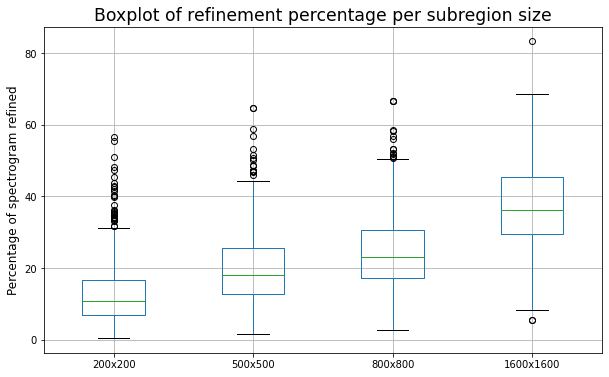

In [49]:
pcts.boxplot(column=['200x200','500x500','800x800','1600x1600'], figsize=[10,6])
plt.ylabel('Percentage of spectrogram refined', fontsize='large')
plt.title('Boxplot of refinement percentage per subregion size', fontsize='xx-large')

In [38]:
pcts = pcts.rename(columns={'1600x1600':'level 1'})

Text(0.5, 1.0, 'Boxplot of refinement percentage at each level')

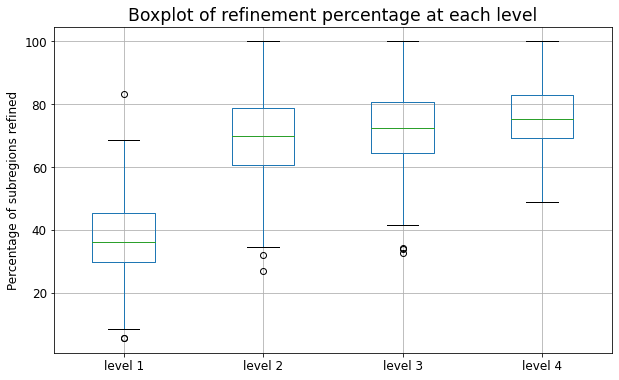

In [40]:
pcts.boxplot(column=['level 1','level 2','level 3','level 4'], figsize=[10,6], fontsize='large')
plt.ylabel('Percentage of subregions refined', fontsize='large')
plt.title('Boxplot of refinement percentage at each level', fontsize='xx-large')

In [24]:
pcts = pd.read_csv('./results/pcts.csv', sep=';')
pcts = treat_pcts(pcts)

In [25]:
pcts['Two levels'] = pcts['pct_multilevel_2'].apply(lambda x: 100*np.prod(np.array(x)/100))
pcts['Three levels'] = pcts['pct_multilevel_3'].apply(lambda x: 100*np.prod(np.array(x)/100))
pcts['Four levels'] = pcts['pct_multilevel_4'].apply(lambda x: 100*np.prod(np.array(x)/100))

In [27]:
pcts = pcts.rename(columns={'pct_1600': 'One level'})

Text(0.5, 1.0, 'Boxplot of refinement pct of total TFP area per number of levels')

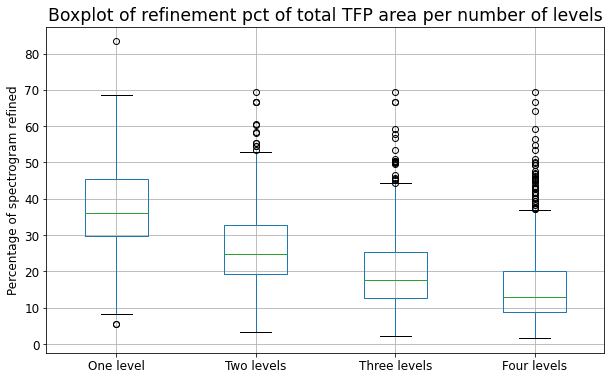

In [29]:
pcts.boxplot(column=['One level','Two levels','Three levels','Four levels'], figsize=[10,6], fontsize='large')
plt.ylabel('Percentage of spectrogram refined', fontsize='large')
plt.title('Boxplot of refinement pct of total TFP area per number of levels', fontsize='xx-large')